In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1.  Read the dataset to the python environment. 

In [167]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [168]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [169]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [170]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [171]:
data.shape

(150, 5)

In [172]:
data.nunique() 

SL                35
SW                23
PL                43
PW                22
Classification     3
dtype: int64

# 2. Do necessary pre-processing steps.

In [173]:
data.groupby('Classification')[['SL']].median()

,SL
Classification,
Iris-setosa,5.00
Iris-versicolor,5.85
Iris-virginica,6.50


In [174]:
data.groupby('Classification')[['SW']].median()

,SW
Classification,
Iris-setosa,3.4
Iris-versicolor,2.8
Iris-virginica,3.0


In [175]:
data.groupby('Classification')[['PL']].median()

,PL
Classification,
Iris-setosa,1.50
Iris-versicolor,4.35
Iris-virginica,5.55


In [176]:
#Handling the missing values
data['SL'] = data['SL'].fillna(data.groupby('Classification')['SL'].transform('median'))
data['SW'] = data['SW'].fillna(data.groupby('Classification')['SW'].transform('median'))
data['PL'] = data['PL'].fillna(data.groupby('Classification')['PL'].transform('median'))

In [177]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [178]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
data['Classification']= label_encoder.fit_transform(data['Classification'])

In [179]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.0,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


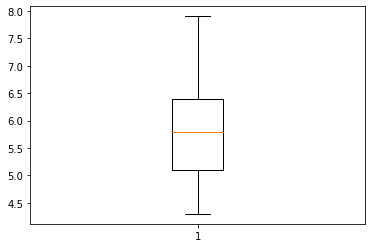

In [180]:
#checking outliers
plt.boxplot(data['SL'])
plt.show()

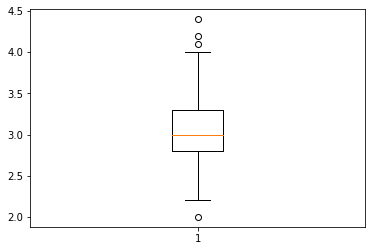

In [181]:
plt.boxplot(data['SW'])
plt.show()

In [182]:
#Handling outliers
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.3


In [183]:
IQR=Q3-Q1
up_limt=Q3+1.5*IQR
lw_limt=Q1-1.5*IQR
print(up_limt)
print(lw_limt)

4.05
2.05


In [184]:
outlier=[]
for x in data['SW']:
    if((x>up_limt)or(x<lw_limt)):
        outlier.append(x)
outlier

[4.4, 4.1, 4.2, 2.0]

In [185]:
ind1=data['SW']>up_limt
data.loc[ind1].index

Int64Index([15, 32, 33], dtype='int64')

In [186]:
ind2=data['SW']<lw_limt
data.loc[ind2].index

Int64Index([60], dtype='int64')

In [187]:
data.drop([15, 32, 33,60],inplace=True)

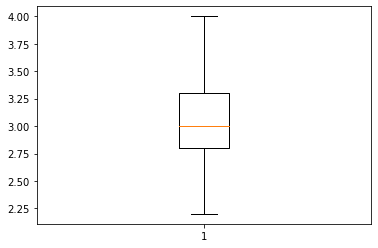

In [188]:
plt.boxplot(data['SW'])
plt.show()

In [189]:
#Droped 4 rows of outliers

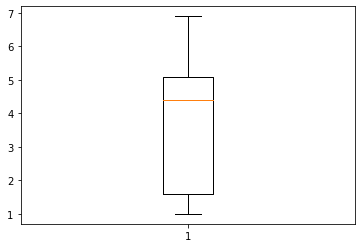

In [190]:
plt.boxplot(data['PL'])
plt.show()

# 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

In [191]:
y=data['Classification']
x=data[['SL', 'SW', 'PL', 'PW']]

In [192]:
from sklearn.preprocessing import StandardScaler  
scaler= StandardScaler ()
data=scaler.fit_transform(data)

In [193]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.20)

# 1 Logistic Regression

In [194]:
from sklearn.linear_model import LogisticRegression
logistic_model= LogisticRegression()
logistic_model.fit(x_train,y_train)
y_predict=logistic_model.predict(x_test)

C:\Users\ALEX JOSHY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [195]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score

In [196]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [197]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [202]:
f1_score(y_test, y_predict,average=None)

array([1.        , 0.93333333, 0.95238095])

# 2 KNN

In [206]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train,y_train)
KNN.predict(x_test)

array([0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [207]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [208]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [209]:
f1_score(y_test, y_predict,average=None)

array([1.        , 0.93333333, 0.95238095])

# 3. Random Forest

In [211]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10,random_state=0)
classifier.fit(x_train,y_train)
classifier.predict(x_test)

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [212]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [213]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [214]:
f1_score(y_test, y_predict,average=None)

array([1.        , 0.93333333, 0.95238095])

# 4.Kernal SVM

In [215]:
from sklearn.svm import SVC
classifier=SVC(random_state=0)
classifier.fit(x_train,y_train)
classifier.predict(x_test)

array([0, 2, 0, 0, 0, 2, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 2, 1,
       0, 1, 0, 1, 1, 2, 2, 0])

In [216]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [217]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [218]:
f1_score(y_test, y_predict,average=None)

array([1.        , 0.93333333, 0.95238095])

# 5.DecessionTreeClassifier

In [220]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.predict(x_test)

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [221]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [222]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [223]:
f1_score(y_test, y_predict,average=None)

array([1.        , 0.93333333, 0.95238095])

# 6.GradientBoostingClassifier

In [224]:
from sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier()
gbc.fit(x_train,y_train)
gbc.predict(x_test)

array([0, 2, 0, 0, 0, 2, 0, 1, 2, 0, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 2, 2,
       0, 1, 0, 1, 1, 2, 2, 0])

In [225]:
accuracy_score(y_test,y_predict)

0.9666666666666667

In [226]:
confusion_matrix(y_test,y_predict)

array([[12,  0,  0],
       [ 0,  7,  1],
       [ 0,  0, 10]], dtype=int64)

In [227]:
f1_score(y_test, y_predict,average=None)

array([1.        , 0.93333333, 0.95238095])

In [ ]:
#All the 6 classification moddles are good.